In [4]:
import pickle
import requests
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import numpy as np

load_dotenv()
key = os.getenv('API_KEY')
#mrts = ["Yio Chu Kang", "Ang Mo Kio"]
api_url = "http://api.positionstack.com/v1/forward"

longLats = pickle.load(open('./longLat.pkl', 'rb'))
"""
responses = []
for mrt in mrts:
  response = requests.get(f"{api_url}?access_key={key}&query={mrt}+station+singapore")
  responses.append(response.json())
  first_response = response.json()['data'][0]
  if (first_response['confidence'] > 0.9) and (first_response['country']=='Singapore'):
    longLats[f"{mrt} MRT"] = (first_response['longitude'], first_response['latitude'])
    print(f"{first_response['label']}, confidence {first_response['confidence']}")
  else:
    print(f"check {mrt}. confidence of {first_response['confidence']}")

pickle.dump(longLats, open('./longLat.pkl', 'wb'))
len(longLats)
"""
len(longLats)
longLats


{'Marsiling MRT': (103.773684, 1.432404),
 'Woodlands MRT': (103.787231, 1.437255),
 'Admiralty MRT': (103.800634, 1.44066),
 '717B WOODLANDS DR 70': (103.799462, 1.440972),
 '1 MARSILING DR': (103.775741, 1.440645),
 '6 MARSILING DR': (103.776437, 1.442079),
 '24 MARSILING DR': (103.77213, 1.44152),
 '2 MARSILING DR': (103.776696, 1.439912),
 '15 MARSILING LANE': (103.778245, 1.44195),
 '19 MARSILING LANE': (103.777329, 1.443264),
 '180B MARSILING RD': (103.778421, 1.439101),
 '571C WOODLANDS AVE 1': (103.790505, 1.430116),
 '780A WOODLANDS CRES': (103.801468, 1.448493),
 '886D WOODLANDS DR 50': (103.794612, 1.438366),
 '886B WOODLANDS DR 50': (103.794612, 1.438366),
 '785B WOODLANDS RISE': (103.8055, 1.446892),
 '784C WOODLANDS RISE': (103.805257, 1.445373),
 '152 WOODLANDS ST 13': (103.77423, 1.435074),
 '145 WOODLANDS ST 13': (103.773246, 1.436117),
 '148 WOODLANDS ST 13': (103.774029, 1.435771),
 '319 WOODLANDS ST 31': (103.777398, 1.431514),
 '302A WOODLANDS ST 31': (103.77506, 1

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import re
import torch
#import matplotlib.pyplot as plt
import fastai.tabular.all as fastai
np.set_printoptions(linewidth=130)

# clean up data: area, date, floor, price
def load_csv():
  #return pd.read_csv('./data/Woodlands_June22_May23.csv')
  return pd.read_csv('./data/resale-flat-from-jan-2017.csv')
floor_dict = { f'0{i*3+1} TO 0{i*3+3}' if i < 3 else f'{i*3+1} TO {i*3+3}': i*3+2  for i in range(17)  }
def floor_cleanup(df):
  df['floor'] = df.storey_range.apply(lambda x:float(floor_dict[x]) if isinstance(x,str) else x)
  df.drop(['storey_range'], axis=1, inplace=True)
  return df
date_dict = { f'20{17+i}-0{j+1}' if j < 9 else f'20{17+i}-{j+1}': i*12+j  for i in range(7) for j in range(12)  }
def date_cleanup(df):
  df['date'] = df.month.apply(lambda x:float(date_dict[x]) if isinstance(x,str) else x)
  df.drop(['month'], axis=1, inplace=True)
  return df
def load_and_cleanup():
  df = load_csv()
  df = floor_cleanup(df)
  df = date_cleanup(df)
  return df

df = load_and_cleanup()
df.describe()
date_max = df.date.max()
#df.head()
dfB = df[(df.town=="BISHAN") & (df.date > date_max-12)]

from pathlib import Path
file = Path('./data/Bishan_June22_May23.csv')
dfB.to_csv(file,index=False)
dfB


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,floor,date
127875,BISHAN,3 ROOM,115,BISHAN ST 12,64.0,Simplified,1986,62 years 08 months,470000.0,8.0,65.0
127876,BISHAN,3 ROOM,121,BISHAN ST 12,64.0,Simplified,1986,63 years 01 month,435000.0,5.0,65.0
127877,BISHAN,3 ROOM,171,BISHAN ST 13,64.0,Simplified,1988,64 years 08 months,420000.0,8.0,65.0
127878,BISHAN,3 ROOM,313,SHUNFU RD,67.0,New Generation,1985,62 years 01 month,476888.0,5.0,65.0
127879,BISHAN,3 ROOM,307,SHUNFU RD,67.0,New Generation,1985,61 years 11 months,495000.0,11.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
152462,BISHAN,5 ROOM,442,SIN MING AVE,125.0,Improved,1990,65 years 10 months,800000.0,8.0,76.0
152463,BISHAN,5 ROOM,442,SIN MING AVE,125.0,Improved,1990,65 years 10 months,860000.0,2.0,76.0
152464,BISHAN,EXECUTIVE,212,BISHAN ST 23,150.0,Maisonette,1992,68 years,970000.0,2.0,76.0
152465,BISHAN,EXECUTIVE,212,BISHAN ST 23,149.0,Maisonette,1992,68 years,1010000.0,5.0,76.0


In [8]:
def load_csv():
  return pd.read_csv('./data/Bishan_June22_May23.csv')
df = load_csv()
blk_street = df.block + ' ' + df.street_name

responses = []
for i,add in enumerate(blk_street.unique()):
  response = requests.get(f"{api_url}?access_key={key}&query={add}+singapore")
  responses.append(response.json())
  first_response = response.json()['data'][0]
  if (first_response['confidence'] > 0.9) and (first_response['country']=='Singapore'):
    longLats[f"{add}"] = (first_response['longitude'], first_response['latitude'])
    print(f"{first_response['label']}, confidence {first_response['confidence']}, {i} of {len(blk_street.unique())}")
  else:
    print(f"check {add}. confidence of {first_response['confidence']}")

pickle.dump(longLats, open('./longLat.pkl', 'wb'))
len(longLats)


115 Bishan Street 12, Singapore, confidence 1
121 Bishan Street 12, Singapore, confidence 1
171 Bishan Street 13, Singapore, confidence 1
313 Shunfu Road, Singapore, confidence 1
307 Shunfu Road, Singapore, confidence 1
308 Shunfu Road, Singapore, confidence 1
406 Sin Ming Avenue, Singapore, confidence 1
22 Sin Ming Road, Singapore, confidence 1
131 Bishan Street 12, Singapore, confidence 1
120 Bishan Street 12, Singapore, confidence 1
116 Bishan Street 12, Singapore, confidence 1
107 Bishan Street 12, Singapore, confidence 1
176 Bishan Street 13, Singapore, confidence 1
181 Bishan Street 13, Singapore, confidence 1
243 Bishan Street 22, Singapore, confidence 1
203 Bishan Street 23, Singapore, confidence 1
226 Bishan Street 23, Singapore, confidence 1
266 Bishan Street 24, Singapore, confidence 1
273B Bishan Street 24, Singapore, confidence 1
286 Bishan Street 24, Singapore, confidence 1
272 Bishan Street 24, Singapore, confidence 1
455 Sin Ming Avenue, Singapore, confidence 1
407 Sin 

1054

In [9]:
def lat_long(df):
  adds = (df.block + ' ' + df.street_name)
  longLat = adds.apply(lambda x: longLats[x])
  df['long'] = longLat.apply(lambda x: x[0])
  df['lat'] = longLat.apply(lambda x: x[1])
  return df
lat_long(df)
df.describe()

,floor_area_sqm,lease_commence_date,resale_price,floor,date,long,lat
count,430.000000,430.000000,4.300000e+02,430.000000,430.000000,430.000000,430.000000
mean,107.625581,1989.353488,7.509216e+05,8.446512,70.106977,103.845989,1.353073
std,24.721041,6.572577,2.202638e+05,6.091048,3.559379,0.006821,0.005786
min,64.000000,1973.000000,2.950000e+05,2.000000,65.000000,103.829749,1.343878
25%,89.000000,1986.000000,6.080000e+05,5.000000,67.000000,103.842542,1.347570
50%,107.000000,1988.000000,7.365000e+05,8.000000,70.000000,103.847114,1.354749
75%,121.000000,1992.000000,8.922500e+05,11.000000,73.000000,103.851517,1.357968
max,163.000000,2011.000000,1.390000e+06,38.000000,76.000000,103.856777,1.363419


In [10]:
dls = fastai.TabularDataLoaders.from_df(df,procs=[fastai.Normalize],cont_names=["floor", "floor_area_sqm", "lease_commence_date", "date", "lat","long"],y_names=["resale_price"])
dls.show_batch()

,floor,floor_area_sqm,lease_commence_date,date,lat,long,resale_price
0,11.0,137.000000,1992.0,71.0,1.356682,103.849358,911880.0
1,11.0,121.000000,1986.0,76.0,1.345513,103.848312,880000.0
2,11.0,121.000000,1987.0,65.0,1.346170,103.856010,815000.0
3,5.0,67.000001,1985.0,70.0,1.350116,103.838730,420000.0
4,8.0,120.000000,1986.0,66.0,1.363347,103.834839,825000.0
5,2.0,150.000000,1992.0,76.0,1.356636,103.848610,970000.0
6,8.0,122.000001,1988.0,65.0,1.344904,103.853142,810000.0
7,2.0,104.000000,1985.0,69.0,1.346891,103.849098,643888.0
8,2.0,84.000000,1987.0,65.0,1.348837,103.852898,518000.0
9,17.0,162.000000,1990.0,68.0,1.359045,103.829895,1280000.0


SuggestedLRs(valley=0.0014454397605732083, slide=6.309573450380412e-07)

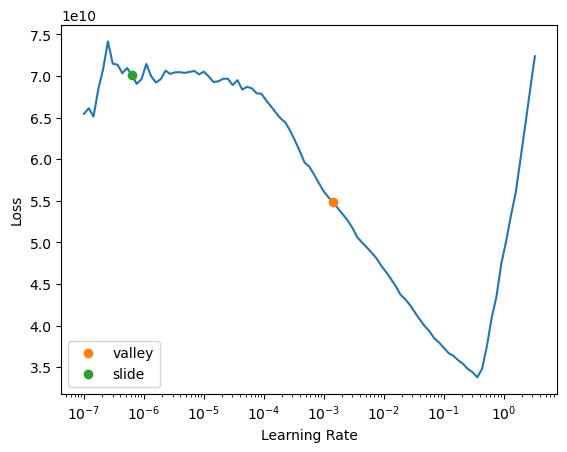

In [11]:
def MSE(yhat,y):
  return torch.mean(torch.square(yhat-y))
def RMSE(yhat,y):
  return torch.sqrt(MSE(yhat,y))
learn = fastai.tabular_learner(dls,y_range=(df.resale_price.min()*0.95, df.resale_price.max()*1.05),loss_func=MSE,metrics=RMSE)
learn.lr_find(suggest_funcs=(fastai.valley,fastai.slide))


In [30]:
learn = fastai.tabular_learner(
  dls,y_range=(df.resale_price.min()*0.95, df.resale_price.max()*1.05),
  loss_func=MSE,metrics=RMSE,
  cbs=[fastai.SaveModelCallback(),fastai.EarlyStoppingCallback(patience=5)]
)
learn.fit_one_cycle(100,5e-3)
learn.validate()


Better model found at epoch 0 with valid_loss value: 62000.5390625.


(#2) [3930523904.0,62000.5390625]

In [18]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 58564.69921875.


(#2) [3466628352.0,58564.69921875]

In [31]:
# predict prices on map
row = df.drop(['resale_price'], axis=1).iloc[0].copy()
cats = ['floor', 'floor_area_sqm', 'lease_commence_date', 'date']
for cat in cats:
  row[cat] = df[cat].median()
latMin, latMax = df.lat.min(),df.lat.max()
latLeft = latMin - (latMax-latMin)/10
latRight = latMax + (latMax-latMin)/10
longMin, longMax = df.long.min(),df.long.max()
longLeft = longMin - (longMax-longMin)/10
longRight = longMax + (longMax-longMin)/10
n1 = 7*20
n2 = 6*20
longs = np.linspace(longLeft, longRight, n1)
lats = np.linspace(latLeft, latRight, n2)
prices = np.ndarray((n2,n1))
for i,lat in enumerate(lats):
  row['lat'] = lat
  for j,long in enumerate(longs):
    row['long'] = long
    _, yPred, _ = learn.predict(row)
    prices[i][j] = yPred.item()
    print(f"{i} of {n1}")

In [33]:
mrts = ["Bishan MRT"]

responses = []
for mrt in mrts:
  response = requests.get(f"{api_url}?access_key={key}&query={mrt}+station+singapore")
  responses.append(response.json())
  first_response = response.json()['data'][0]
  if (first_response['confidence'] > 0.9) and (first_response['country']=='Singapore'):
    longLats[f"{mrt}"] = (first_response['longitude'], first_response['latitude'])
    print(f"{first_response['label']}, confidence {first_response['confidence']}")
  else:
    print(f"check {mrt}. confidence of {first_response['confidence']}")

pickle.dump(longLats, open('./longLat.pkl', 'wb'))
len(longLats)


MRT Bishan Depot, Singapore, confidence 1


1055

In [35]:
longLats["Bishan MRT"] = (103.84825, 1.35094)
pickle.dump(longLats, open('./longLat.pkl', 'wb'))


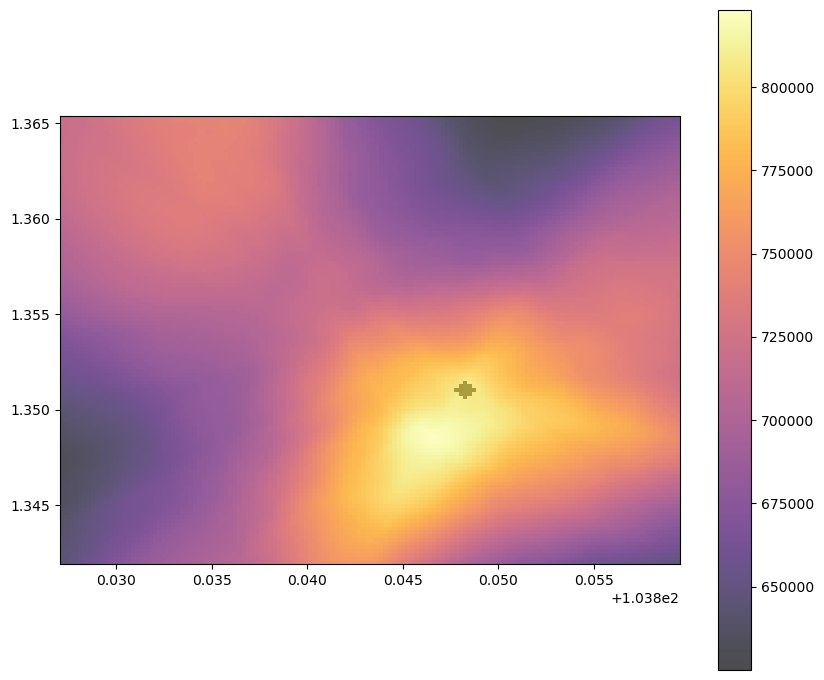

In [36]:
def min_coords(long,lat):
  return (np.abs((longs-long)).argmin(), np.abs(lats-lat).argmin())
mrt_map = np.zeros((n2,n1))
#mrts = ["Yio Chu Kang MRT", "Ang Mo Kio MRT"]
#for mrt in mrts:
#  (i,j) = min_coords(*longLats[mrt])
#  #for m in range(3):
#  #  for n in range(3):
#  mrt_map[j+m-1][i+n-1] = 1

"""
(i,j) = min_coords(*longLats[mrts[0]])
mrt_map[j+1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j-1][i-2]=1
mrt_map[j-1][i-1]=1
mrt_map[j-1][i+2]=1
mrt_map[j-1][i+1]=1
mrt_map[j-1][i]=1
(i,j) = min_coords(*longLats[mrts[4]])
mrt_map[j-1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j+1][i-2]=1
mrt_map[j+1][i-1]=1
mrt_map[j+1][i+2]=1
mrt_map[j+1][i+1]=1
mrt_map[j+1][i]=1
(i,j) = min_coords(*longLats[mrts[0]])
mrt_map[j-2][i+1]=1
mrt_map[j-1][i+1]=1
mrt_map[j-1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j+1][i]=1
mrt_map[j+1][i+1]=1
mrt_map[j+2][i+1]=1
(i,j) = min_coords(*longLats[mrts[2]])
mrt_map[j-2][i-1]=1
mrt_map[j-1][i-1]=1
mrt_map[j-1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j+1][i]=1
mrt_map[j+1][i-1]=1
mrt_map[j+2][i-1]=1
"""
(i,j) = min_coords(*longLats[mrts[0]])
mrt_map[j+1][i]=1
mrt_map[j+1][i-1]=1
mrt_map[j+1][i+1]=1
mrt_map[j-1][i]=1
mrt_map[j-1][i+1]=1
mrt_map[j-1][i-1]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j][i-2]=1
mrt_map[j][i+2]=1
mrt_map[j+2][i]=1
mrt_map[j-2][i]=1

fig,ax=plt.subplots()
#mrt
#color map
shw2 = ax.imshow(mrt_map, extent=[longLeft, longRight, latLeft, latRight], origin='lower',cmap='Greys',alpha=1.0)
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.7, cmap='inferno')
bar = plt.colorbar(shw)
fig.set_figwidth(10)
fig.set_figheight(10/7*6)

plt.show()

In [50]:
longLeft,longRight

(103.8288214, 103.8619606)

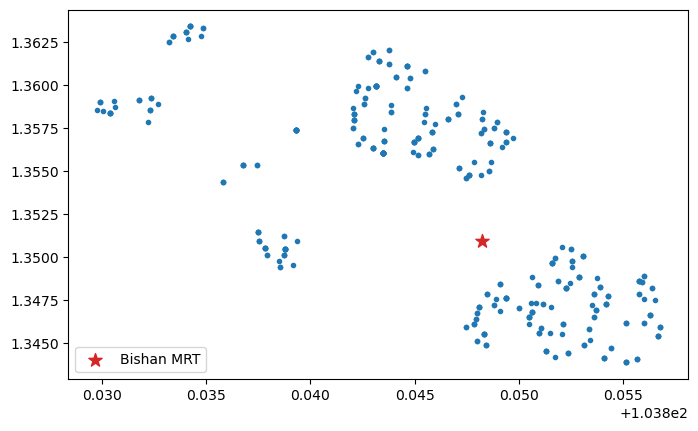

In [37]:
markers = ["*"]

fig,ax2=plt.subplots()
ax2.scatter(df.long,df.lat,marker='.')
for i,mrt in enumerate(mrts):
  ax2.scatter([longLats[mrt][0]], [longLats[mrt][1]],marker=markers[i],c='#d62728',label=mrt,s=100)
ax2.legend(loc='lower left')
fig.set_figwidth(8)

plt.show()


for mrt in mrts:
  (i,j) = min_coords(*longLats[mrt])
